# Handout #4 - Part A : Beast Cancer - Checking a Theory: Area ~ Radius


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 4.1


Consider the well-known Wisconsin Breast Cancer dataset that is commonly used by those studying machine learning.  This data includes a wide variety of characteristics measured on the nuclei of cells found in breast-tissue.  Here, only a small subset of the orginal set of characteristics will be considered.

<ul>
  <li><strong>Response Variable</strong>: Area = estimated area of cell</li>
  <li><strong>Predictor Variables</strong>: </li>
  <ul>
    <li>Radius: estimated radius of cell</li>
    <li>Perimeter: estimted perimeter of cell</li>
    <li>Type: Benign or Malignant</li>
    <ul><u>Note</u>: In reality, cell type would likely be the response variable.</li>
  </ul>
</ul>
<br><br>

<table align="center">
  <tr>
    <td width='50%' align="center" valign="top"><strong>Benign (Non-cancerous)</strong></td>
    <td width='50%' align="center" valign="top"><strong>Malignant (Cancerous)</strong></td>
  </tr>
  <tr>
        <td width='50%' align="center" valign="top"><img src="https://drive.google.com/uc?export=view&id=15FVS34R8fqlyVJK3xGzWLadSb5iUYjU1"></img>
        </td>
         <td width='50%' align="center" valign="top"><img src="https://drive.google.com/uc?export=view&id=1665CJjr4sDA50FaS0rVd5Q8djMRUSg8M"></img>
        </td>
</tr>
</table>

<font size="-2"><u>Original Source</u>: W.N. Street, W.H. Wolberg and O.L. Mangasarian Nuclear feature extraction for breast tumor diagnosis.  IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.</font>


Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Theoretical Considerations

Generally speaking, cells tend to be circular in shape.  Thus, a known relationship may exist between the cell area and the cell radius.  In particular, the following relationships hold true if cells are truely cicular in shape.

<table align="center">
  <tr>
    <td colspan="2" align="center" valign="top"><font size="+1">Methods for Estimating Area</font></td>
  </tr>
  <tr>
    <td align="center" valign="top"><font size="+1">Using Radius</font><br>
    <img src="https://drive.google.com/uc?export=view&id=1M8_LscIImaw4XYSfD81vjYqMIW-mZ_Q_"></img>
    </td>
    <td align="center" valign="top"><font size="+1">Using Perimeter</font><br>
    <img src="https://drive.google.com/uc?export=view&id=1fdFfAtb6Ibq6AHcaFoGJXPtSMrVrHLi7"></img>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top"><font size="+1">Area = &#960; * Radius<sup>2</sup></font></td>
    <td align="center" valign="top"><font size="+1">Perimeter = 2&#960; * Radius</font></td>
  </tr>

</table>




## Loading the Data

First, loading the tidyverse() package into this COLAB session.

In [18]:
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset.

In [19]:
# Reading data in using read.csv via Base
BreastCancer <- read_csv("http://www.StatsClass.org/stat360/Datasets/BreastCancer.csv")

Rows: 569 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Type
dbl (4): RowID, Radius, Perimeter, Area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
# View the first few rows of data
head(BreastCancer)

RowID Type      Radius Perimeter Area  
1 1     Malignant 17.99  122.80    1001.0
2 2     Malignant 20.57  132.90    1326.0
3 3     Malignant 19.69  130.00    1203.0
4 4     Malignant 11.42   77.58     386.1
5 5     Malignant 20.29  135.10    1297.0
6 6     Malignant 12.45   82.57     477.1

## Distribution of Area | Radius

Consider the following plot that shows the relationship between cell area and radius.

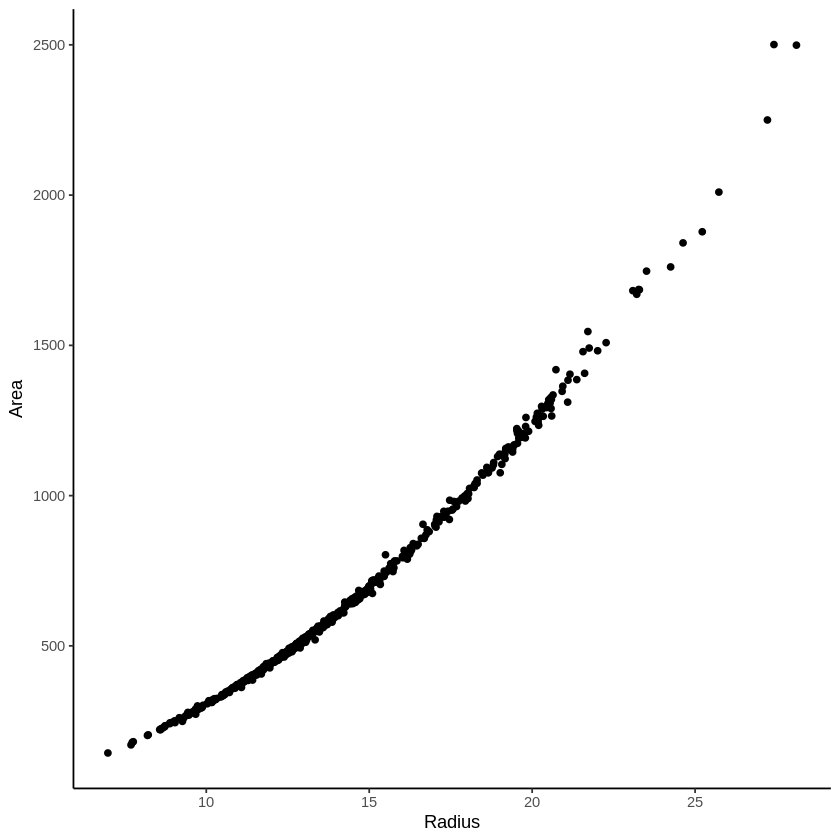

In [21]:
#Getting a scatterplot of Area ~ Radius
ggplot(data=BreastCancer, aes(x=Radius,y=Area) ) +
  geom_point() +
  theme_classic()

Next, consider a slight variation of the plot above.  Here, the type of cell is taken into consideration.

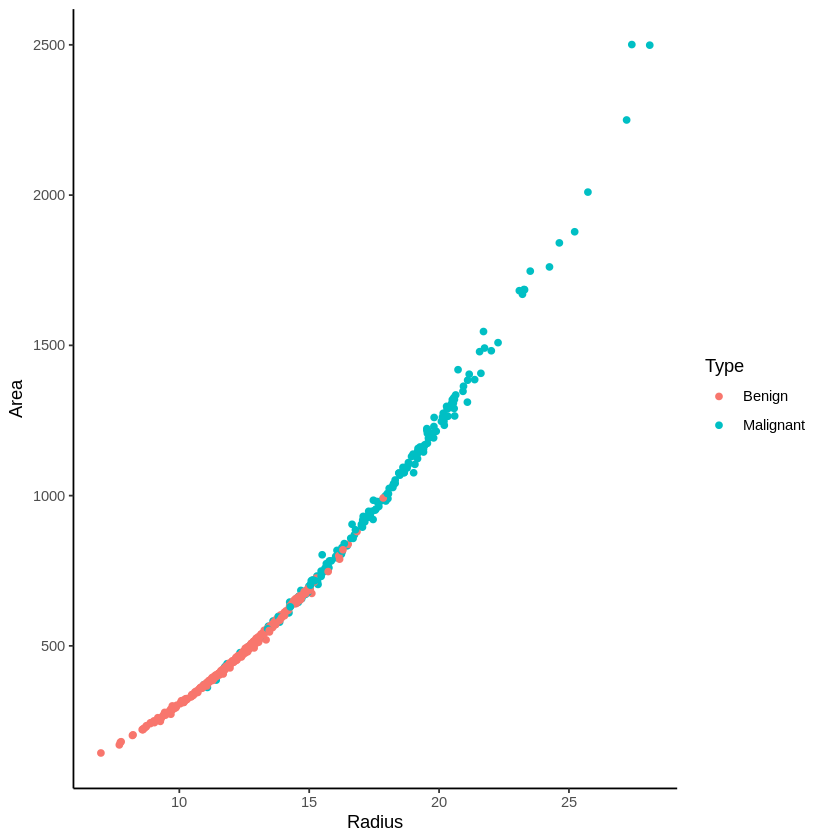

In [22]:
#Getting a scatterplot of Area ~ Radius
ggplot(data=BreastCancer, aes(x=Radius, y=Area, col=Type)) +
  geom_point() +
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions



1.   What is the relationship between cell area and radius of the cell?  Discuss.






2.   Does the mean area appear to change as a function of radius?  Explain.


3.   Does the variance in the area appear to change as a function of radius?  Discuss.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

## Getting the (Theory Based) Mean Function

Consider the known relationship between Area and Radius of a circle to fit the following mean function to this data.

$$E(Area | Radius) = \pi * Radius^2$$

Next, doing this computation and addding it to the existing data.frame.


In [23]:
#Computing the Mean for Area using theory based function
# Mean = pi * radius^2
(BreastCancer
  %>% mutate(
              Estimated_Area = pi * Radius^2
            )
) -> BreastCancer_with_EstimatedArea

head(BreastCancer_with_EstimatedArea)

RowID Type      Radius Perimeter Area   Estimated_Area
1 1     Malignant 17.99  122.80    1001.0 1016.7454     
2 2     Malignant 20.57  132.90    1326.0 1329.2861     
3 3     Malignant 19.69  130.00    1203.0 1217.9832     
4 4     Malignant 11.42   77.58     386.1  409.7152     
5 5     Malignant 20.29  135.10    1297.0 1293.3437     
6 6     Malignant 12.45   82.57     477.1  486.9547

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

4.   The pattern in the plot  appears to have some curvature (i.e. the anticipated increase in area is not constant for all radius values).  Does the mean function $E(Area | Radius)= π*Radius^2$ allow for such curvature?  Explain.







5.   [Math Stuff] Obtain the first derivative of the mean function with respect to radius.  That is, find $\frac{d}{d \space Radius} E(Area | Radius)$.  Is this derivative a function of radius?  What does this imply about the rate of change for this mean function?


6.   The Radius value for the 1st observation in our dataset is 17.99.  Verify the calculation for the Estimated Area | Radius for the 1st observation.


<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

The following plot includes the estimated mean function for Area | Radius.

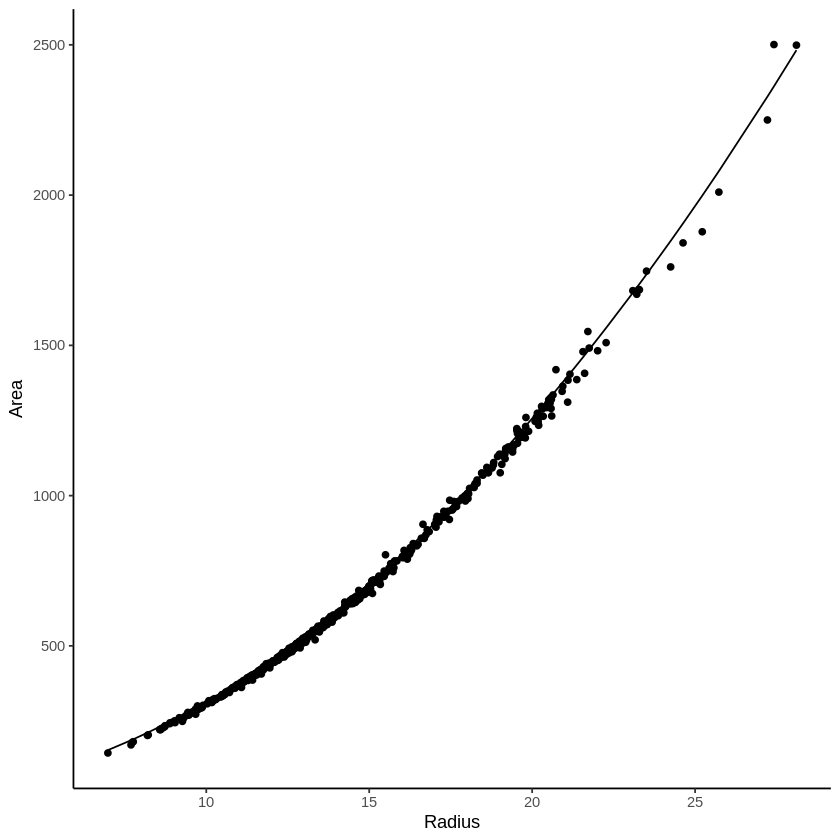

In [24]:
#Adding the mean function to the scatterplot of Area ~ Radius
ggplot(data=BreastCancer_with_EstimatedArea, aes(x=Radius, y=Area)) +
  geom_point() +
  geom_line(aes(x=Radius, y=Estimated_Area)) +
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

7.   Does this model appear to fit this data well?  Discuss.


8.   Do you anticipate the $R^2$ value to be large (near 1) or small (near 0) for this fit?  Explain your reasoning.  <br><u>Hint</u>:  Has this model reduced the unexplained variation in cell area?



<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

### Measure the Quality of the Mean Function -- Computing $R^2$

To begin, compute the $Residuals$ and $Residuals^2$ and add these values to the existing data.frame.

In [25]:
#Computing the residual and residual^2 value for each observation
(BreastCancer_with_EstimatedArea
  %>% mutate(
              Residual = (Area - Estimated_Area),
              Residual_Squared = (Residual)^2
             )
) -> BreastCancer_with_EstimatedArea_and_Residuals

head(BreastCancer_with_EstimatedArea_and_Residuals)

RowID Type      Radius Perimeter Area   Estimated_Area Residual  
1 1     Malignant 17.99  122.80    1001.0 1016.7454      -15.745361
2 2     Malignant 20.57  132.90    1326.0 1329.2861       -3.286077
3 3     Malignant 19.69  130.00    1203.0 1217.9832      -14.983220
4 4     Malignant 11.42   77.58     386.1  409.7152      -23.615204
5 5     Malignant 20.29  135.10    1297.0 1293.3437        3.656256
6 6     Malignant 12.45   82.57     477.1  486.9547       -9.854715
  Residual_Squared
1 247.91638       
2  10.79830       
3 224.49687       
4 557.67787       
5  13.36821       
6  97.11541

Next, compute the total amount of unexplained variation in the marginal and conditional distributions.  An $R^2$ value can be computed from these values.

In [26]:
#Computing the total unexplained variation
cat("\n Total Unexplained Variation in Marginal Distribution\n\n")
(BreastCancer_with_EstimatedArea_and_Residuals
  %>% summarize(
                 Mean = mean(Area),
                 Variance = var(Area),
                 Count = n(),
                 'SSE_Marginal' = (Count-1)*Variance
               )
)

cat("\n Total Unexplained Variation in Conditional Distribution\n\n")
(BreastCancer_with_EstimatedArea_and_Residuals
  %>% summarize(
                  SSE_Conditional = sum(Residual_Squared)
  )
)


 Total Unexplained Variation in Marginal Distribution



Mean     Variance Count SSE_Marginal
1 654.8891 123843.6 569   70343139


 Total Unexplained Variation in Conditional Distribution



SSE_Conditional
1 195075.5

Computing the $R^2$ value when conditioning on Radius and using $E(Area | Radius) = \pi * Radius^2$ as the mean function.

$$
\begin{array}{rcl}
R^2 & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}} \\
    & = & \frac{70343139 - 195075.5}{70343139} \\
    & = & \frac{70148063.5}{70343139} \\
    & = & 0.9972 \\
    & \approx & 99.7\%
\end{array}
$$

<u>Interpretation</u>: About 99.7\% of the variation in Area can be explained by conditioning on Radius when using $E(Area | Radius) = \pi * Radius^2$ as the mean function.

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">Aside</font></td></tr></table>

Certainly the value of $R^2$ **depends** on the mean function used in the conditional distribution. Consider the following plot that includes Malone's best-guess at a linear mean function.  The following estimates for the y-intercept and slope appear to be nearly the best when a linear mean function is used. [Note: A linear mean function is *not* reasonable here.]

$$
E(Area | Radius) = -750 + 100*Radius
$$

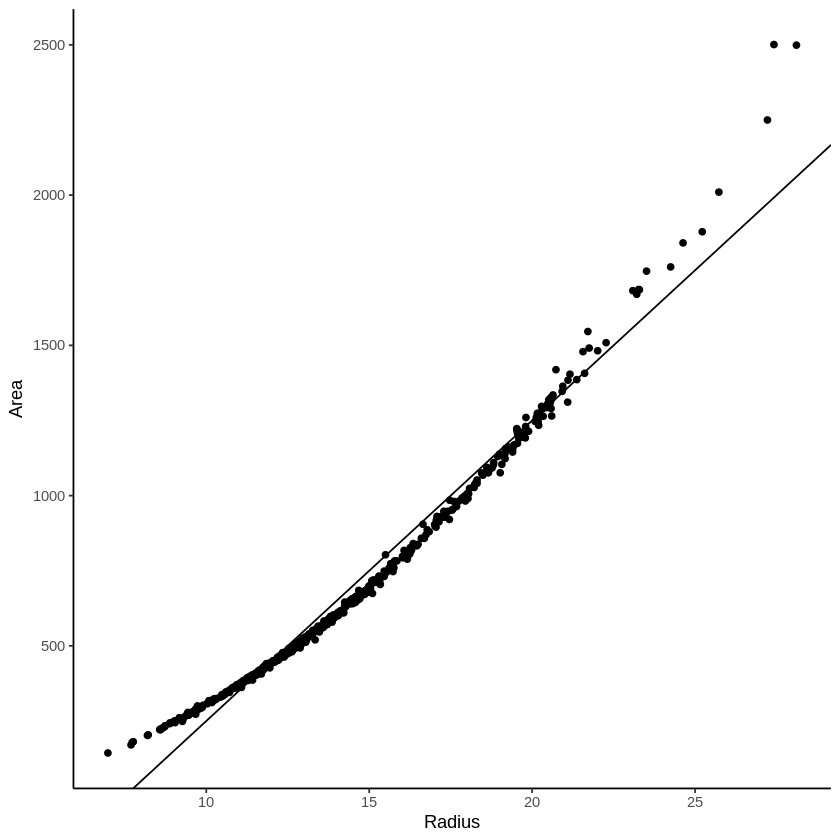

In [27]:
#Using the specified line as the mean function.
ggplot(data=BreastCancer, aes(x=Radius, y=Area)) +
  geom_point() +
  geom_abline(intercept=-750, slope=100) +
  theme_classic()

Getting the Sums of Squared Error (SSE)

In [28]:
#Getting the residual and residual^2 for the specified linear mean function.
(BreastCancer
  %>% mutate(
              Estimated_Area_Line = -750 + 100 * Radius,
              Residual = (Area - Estimated_Area_Line),
              Residual_Squared = (Residual)^2
           )
) -> BreastCancer_with_EstimatedAreaLine_and_Residuals


#Computing the total unexplained variation
cat("\n Total Unexplained Variation in Marginal Distribution\n\n")
(BreastCancer_with_EstimatedAreaLine_and_Residuals
  %>% summarize(
                 Mean = mean(Area),
                 Variance = var(Area),
                 Count = n(),
                 'SSE_Marginal' = (Count-1)*Variance
               )
)

cat("\n Total Unexplained Variation in Conditional Distribution\n\n")
(BreastCancer_with_EstimatedAreaLine_and_Residuals
  %>% summarize(
                  SSE_Conditional = sum(Residual_Squared)
  )
)


 Total Unexplained Variation in Marginal Distribution



Mean     Variance Count SSE_Marginal
1 654.8891 123843.6 569   70343139


 Total Unexplained Variation in Conditional Distribution



SSE_Conditional
1 1816264

Computing the $R^2$ value when conditioning on Radius and using $E(Area | Radius) = -750 + 100*Radius$ as the mean function.

$$
\begin{array}{rcl}
R^2 & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}} \\
    & = & \frac{70343139 - 1816264}{70343139} \\
    & = & \frac{68526875}{70343139} \\
    & = & 0.9742 \\
    & \approx & 97.4\%
\end{array}
$$

Notice that when a different mean function is used, the $R^2$ changes.  Here, the $R^2$ values decreases only a little from 99.7\% to 97.4\%.

<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

### Measuring the Variablity in the Distribution of Area | Radius

Often, an assumption of constant variance is made when considering the variablity about a mean function. Under the assumption constant variance, the $\mbox{Root Mean Squared Error (RMSE)}$ is computed as

$$\begin{array}{rcl}
RMSE & = & \sqrt{\frac{\sum{(Data \space Point \space - Mean)^2}}{(\mbox{n- # parameters in model})}} \\
 & = & \sqrt{\frac{195075.5}{569-0}} \\
 & = & \sqrt{342.84} \\
 & = & 18.52
\end{array}
$$

In [29]:
#Computing Root Mean Square Error
(BreastCancer_with_EstimatedArea_and_Residuals
  %>% summarize(
                  RMSE = sqrt(mean(Residual_Squared))
               )
)

RMSE    
1 18.51592

An investigation into the variablity about a mean function can use either the $Residual^2$ or $|Residual|$.  For a variety of reasons, statisticians tend to base discussion of variability through the use of $Residuals^2$.  On the other hand, data scientists often base their discussions on $|Residuals|$.  

In particular, the $\mbox{Mean Absolute Error (MAE)}$ is often used when evaluating machine learning algorithms.  $MAE$ is constructed under the assumption of constant variance about the mean function.

$$\begin{array}{rcl}
MAE & = & \frac{\sum{|Data \space Point \space - Mean|}}{\mbox{n}} \\
 & = & \frac{7529.6}{569} \\
 & = & 13.23
\end{array}
$$

In [30]:
#Computing the average |Residual|
(BreastCancer_with_EstimatedArea
  %>% mutate(
              Residual = (Area - Estimated_Area),
              AbsResidual = abs(Residual)
             )
  %>% summarize(
                Mean_AbsResiduals = mean(AbsResidual)
              )
)

Mean_AbsResiduals
1 13.23302

### Investigating Patterns in the Residuals

Next, let's consider the variability in the residuals as a function of Radius.


**Question**:  How does cell area vary as a function of cell radius?

An investigation such as this can use the $Residual^2$ or $|Residual|$.  In an effort to keep the residuals on the same scale as the data, the $|Residual|$ will be used in the investigaiton here.  

In [31]:
#Computing the |Residual| for each observation
(BreastCancer_with_EstimatedArea
  %>% mutate(
              Residual = (Area - Estimated_Area),
              AbsResidual = abs(Residual)
             )
) -> BreastCancer_with_EstimatedArea_and_AbsResiduals

head(BreastCancer_with_EstimatedArea_and_AbsResiduals)


RowID Type      Radius Perimeter Area   Estimated_Area Residual   AbsResidual
1 1     Malignant 17.99  122.80    1001.0 1016.7454      -15.745361 15.745361  
2 2     Malignant 20.57  132.90    1326.0 1329.2861       -3.286077  3.286077  
3 3     Malignant 19.69  130.00    1203.0 1217.9832      -14.983220 14.983220  
4 4     Malignant 11.42   77.58     386.1  409.7152      -23.615204 23.615204  
5 5     Malignant 20.29  135.10    1297.0 1293.3437        3.656256  3.656256  
6 6     Malignant 12.45   82.57     477.1  486.9547       -9.854715  9.854715

Next, plot the $|Residual|$ values as a function of Radius.  A loess smoother has been added to this plot. In this plot, it might be beneficial to comment out the geom_point() line to more easily compare the patterns in the residuals.

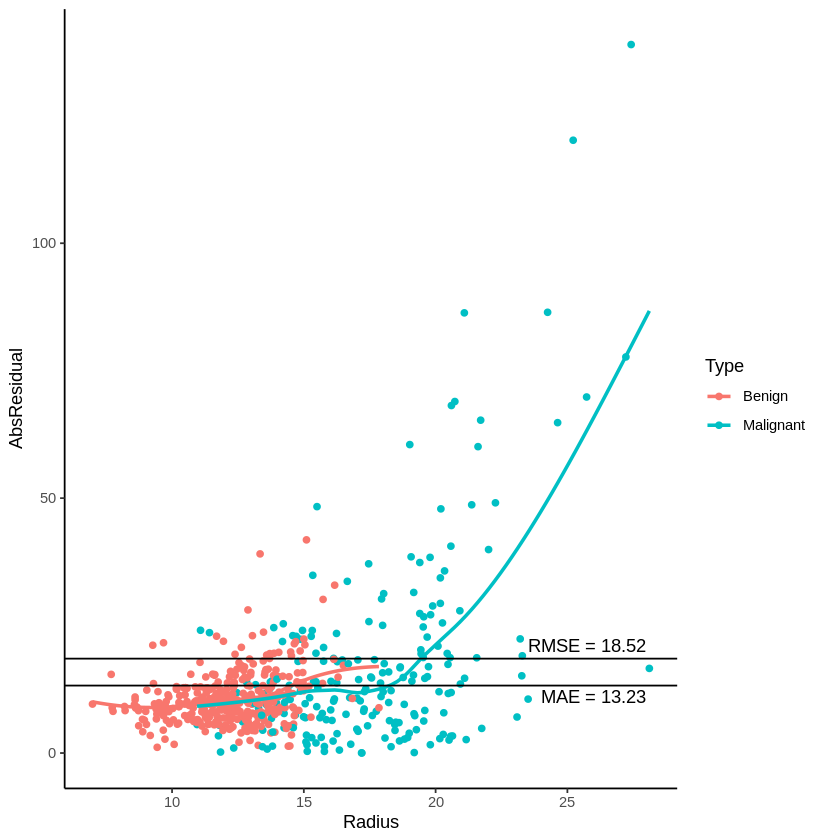

In [32]:
#Getting a scatterplot of AbsResiudal ~ Radius
ggplot(data=BreastCancer_with_EstimatedArea_and_AbsResiduals, aes(x=Radius, y=AbsResidual, col=Type)) +
  geom_point() +
  geom_smooth(method="loess", formula=y~x,se=FALSE) +
  geom_abline(intercept = 13.23, slope=0) + # reference line for MAE
  annotate(
           "text", label = "MAE = 13.23", hjust=1,
            x = 28, y = 11
          ) +
  geom_abline(intercept = 18.52, slope=0) +   # reference line for RMSE
  annotate(
           "text", label = "RMSE = 18.52", hjust=1,
            x = 28, y = 21
          ) +
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

9.   Discuss some of the similarities and/or differences in the estimated variance functions between the two types of cells.


10.   Most of the salmon colored dots (Benign) dots are near the left side of this plot, what does this imply about these cells?



11.     Fill in the blank:  If the cell radius is larger than __________, then a cell is likely to be malignant.  Explain how you arrived at this value.


12.    Is it true that cells whose |Residual| value is larger than 20 are likely to be malignant?  Discuss.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

<u>Comment</u>: There is one last concern with the residuals that we have not considered, and that is the fact that our estimated mean function appears to be *over-estimating* the actual cell area.  This pattern is not apparent when the squared or absolute residuals are used. The following graph plots the residuals vs radius and clearly shows the over-estimation.  The over-estimation appears to be happening for each cell type.

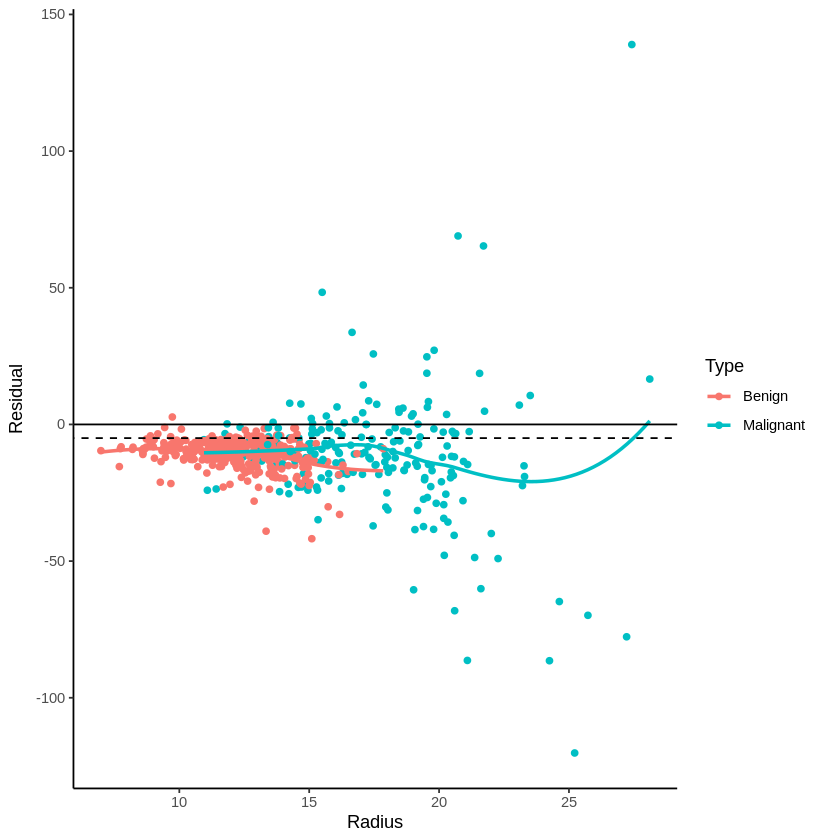

In [33]:
#Getting a scatterplot of Resiudal ~ Radius
ggplot(data=BreastCancer_with_EstimatedArea_and_AbsResiduals, aes(x=Radius, y=Residual, col=Type)) +
  geom_point() +
  geom_smooth(method="loess", formula=y~x,se=FALSE) +
  geom_abline(intercept=0,slope=0) +                     # horizontal line at Residual = 0
  geom_abline(intercept = -5, slope = 0, linetype=2) +   # adjust the intercept of this line to closely match loess smooth
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

13.   How could this graph be used to improve the estimated mean function?  Discuss.


14.   Propose a better mean function:

$$
E(Area | Radius) =
$$



15. Does your answer to Question #2 depend on the Type of cell?  That is, should your improved mean function be different for the two type of cells?  Discuss.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

Consider the following summaries from an updated mean function.

$$
E(Area | Radius) = -10 + \pi * Radius^2
$$



 R^2 and RMSE from the Updated Mean Function



SSE_Marginal SSE_Conditional R_Squared RMSE    
1 70343139     126138.3        0.9982068 14.88906



 Plot of the Residuals from the Updated Mean Function



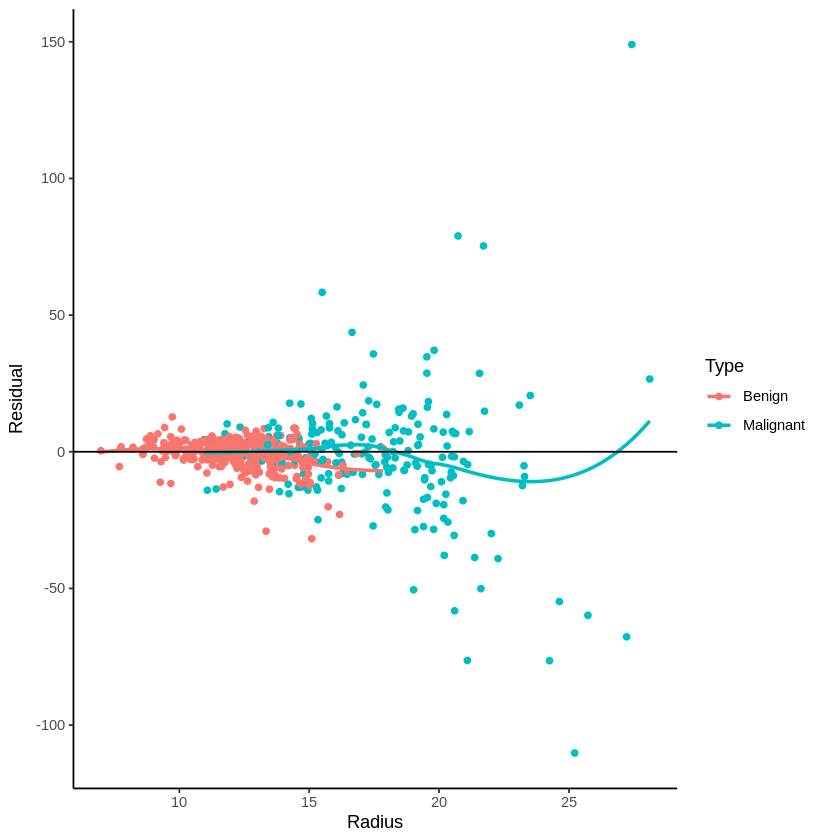

In [34]:
#Computing an updated mean for Area using an adjustment to the theory based approach
# Mean = -10 + pi * radius^2
(BreastCancer
  %>% mutate(
              Estimated_Area = pi * Radius^2,
              Estimated_Area_Updated = -10 + pi * Radius^2
            )
) -> BreastCancer_with_EstimatedAreaUpdated

#Computing the Residuals for the updated mean function
(BreastCancer_with_EstimatedAreaUpdated
  %>% mutate(
              Residual = (Area - Estimated_Area_Updated),
              Residual_Squared = (Residual)^2
            )
) -> BreastCancer_with_EstimatedAreaUpdated_with_Residual

#Computing the R^2 for the updated mean function
cat("\n\n R^2 and RMSE from the Updated Mean Function\n\n")
(BreastCancer_with_EstimatedAreaUpdated_with_Residual
  %>% summarize(
                  SSE_Marginal = (n()-1)*var(Area),
                  SSE_Conditional = sum(Residual_Squared),
                  R_Squared = (SSE_Marginal - SSE_Conditional) / SSE_Marginal,
                  RMSE = sqrt(SSE_Conditional / n())
               )
)

#Getting a scatterplot of Resiudal ~ Radius
cat("\n\n Plot of the Residuals from the Updated Mean Function\n\n")
ggplot(data=BreastCancer_with_EstimatedAreaUpdated_with_Residual, aes(x=Radius, y=Residual, col=Type)) +
  geom_point() +
  geom_smooth(method="loess", formula=y~x,se=FALSE) +
  geom_abline(intercept=0,slope=0) +
  theme_classic()



<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task #1</font></td></tr></table>

## Task:  Questions

16.   Use the model metrics (i.e. $R^2$ and $RMSE$) to verify that the updated mean function is doing better than the original mean function.


17.   Using the information from the scatterplot, verify visually that the updated mean function is doing better than the original mean function.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task #2</font></td></tr></table>

For this task, repeat the analysis conducted above using $Perimeter$ instead of $Radius$ of the cell.

18.  What is the estimated mean function using $Perimeter$?

19.  What is the $R^2$ when $Perimeter$ is used when estimating $Area$?

20.  Which predictor variable is better $Perimeter$ or $Radius$ when estimating $Area$?

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

---



---
End of Document
